# When working on an NLP project, there are several steps involved that help ensure a successful outcome. Here are the key steps typically followed in an NLP project:

### 1.Define the Problem: Clearly articulate the problem you aim to solve with NLP. Identify the specific task or objective, such as sentiment analysis, text classification, or machine translation. Understand the requirements and constraints of the problem to establish a clear project scope.

### 2.Gather and Preprocess Data: Collect a suitable dataset that aligns with your problem statement. This may involve acquiring existing datasets or creating your own by scraping websites, utilizing APIs, or gathering labeled data. Preprocess the data by cleaning it, removing noise, handling missing values, and standardizing the format. Text preprocessing techniques include tokenization, stemming, lemmatization, and removing stopwords.

### 3.Exploratory Data Analysis (EDA): Perform exploratory analysis on the dataset to gain insights into the data distribution, class balance, and any patterns present. Visualize the data, calculate statistics, and explore relationships between variables. EDA helps in understanding the characteristics of the data and guides subsequent steps.

### 4.Feature Engineering: Extract meaningful features from the text data to represent it in a numerical format that can be understood by machine learning models. This step involves techniques like word embeddings, TF-IDF (Term Frequency-Inverse Document Frequency), bag-of-words representations, and other domain-specific feature extraction methods.

### 5.Model Selection and Training: Choose an appropriate NLP model or algorithm that suits the problem at hand. This may involve using traditional machine learning algorithms like Naive Bayes, Support Vector Machines (SVM), or newer deep learning models such as Recurrent Neural Networks (RNNs), Convolutional Neural Networks (CNNs), or Transformer-based models like BERT or GPT. Train the chosen model on your labeled dataset, using a suitable training strategy and optimization techniques.

### 6.Model Evaluation: Evaluate the performance of your trained model using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC-ROC). Validate the model using validation data or through techniques like cross-validation. Assess the model's strengths, weaknesses, and potential areas for improvement.

### 7.Model Fine-Tuning: Iterate on the model and its parameters to improve its performance. Fine-tuning may involve adjusting hyperparameters, exploring different architectures, or employing techniques like regularization, dropout, or ensembling to enhance the model's effectiveness.

### 8.eployment and Integration: Once you have a satisfactory model, deploy it in a production environment or integrate it into your desired application or system. This may involve creating APIs or building a user interface to allow users to interact with the NLP functionality. Ensure proper testing and validation before deployment to ensure reliable performance.

### 9.Ongoing Monitoring and Maintenance: Continuously monitor the performance of the deployed model and collect feedback from users. Address any issues that arise and consider retraining or updating the model periodically as new data becomes available. Maintenance is essential to keep the NLP system up-to-date and accurate.

Throughout the project, it's crucial to document the steps taken, make note of any challenges faced, and maintain good practices for reproducibility. NLP projects often involve an iterative process, where you refine and improve the models and techniques based on the feedback and evaluation results

## Import Python Library

In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AshutoshKumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Read the Data using pandas

In [3]:
df=pd.read_csv("C:\\Users\\AshutoshKumar\\Downloads\\IMDB Dataset.csv\\IMDB Dataset.csv")

# EDA

In [4]:

df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Checking for null values in dataset

In [76]:
df.isnull().sum()

review        0
sentiment     0
word count    0
dtype: int64

### Countplot of +ve and -ve Review

Text(0.5, 1.0, 'Sentiment distribution')

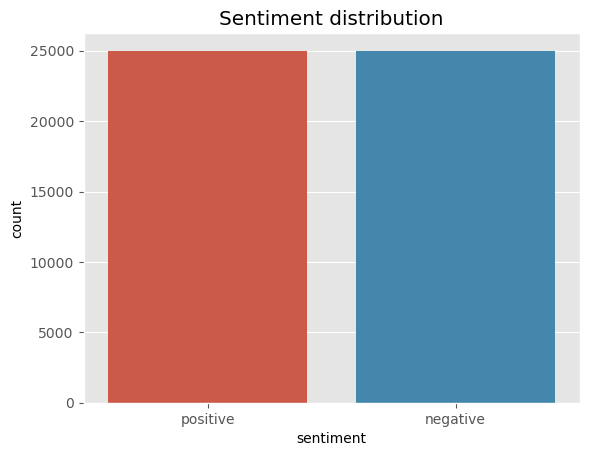

In [7]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [8]:
df['review'][45000]

"What I enjoyed most in this film was the scenery of Corfu, being Greek I adore my country and I liked the flattering director's point of view. Based on a true story during the years when Greece was struggling to stand on her own two feet through war, Nazis and hardship. An Italian soldier and a Greek girl fall in love but the times are hard and they have a lot of sacrifices to make. Nicholas Cage looking great in a uniform gives a passionate account of this unfulfilled (in the beginning) love. I adored Christian Bale playing Mandras the heroine's husband-to-be, he looks very very good as a Greek, his personality matched the one of the Greek patriot! A true fighter in there, or what! One of the movies I would like to buy and keep it in my collection...for ever!"

### Looking for first 5 Review and their sentiment

In [9]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

### Count the No of words in review

In [10]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [11]:
df['word count'] = df['review'].apply(no_of_words)

In [12]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

### Hist Plot of No of words in +ve and -ve Review

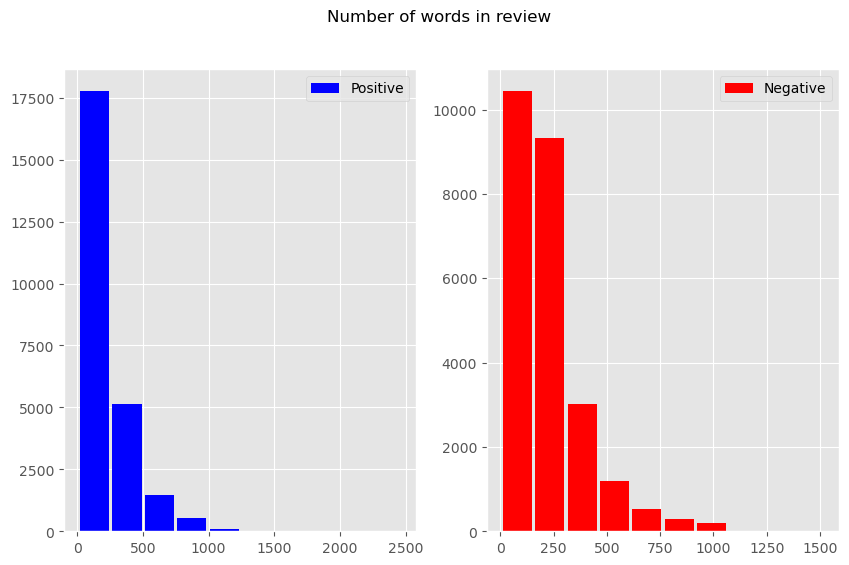

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [14]:
a=df[df['sentiment']=='positive']
a.max()

review        ý thýnk uzak ýs the one of the best films of a...
sentiment                                              positive
word count                                                 2470
dtype: object

In [15]:
df[df['sentiment'] == 'positive']['review'].str.len()

0        1761
1         998
2         926
4        1317
5         656
         ... 
49983     695
49985    1168
49989     967
49992     968
49995    1008
Name: review, Length: 25000, dtype: int64

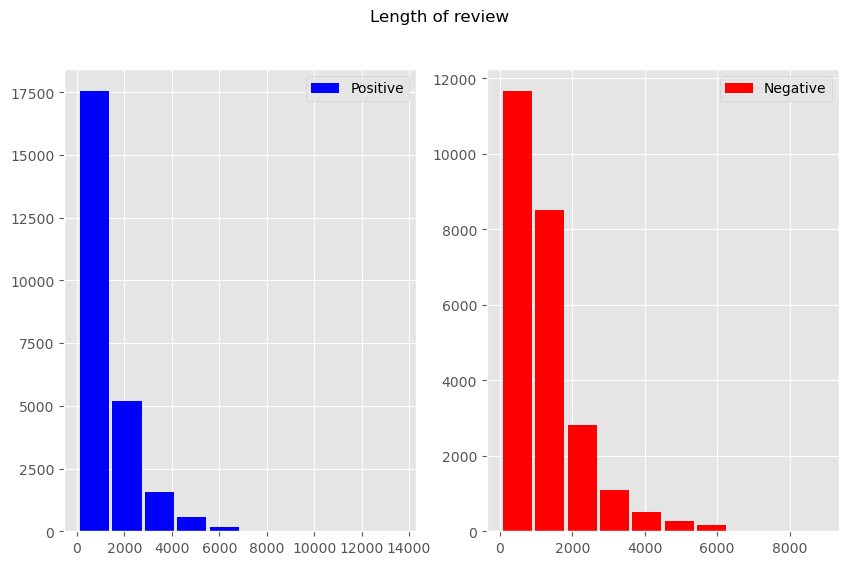

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Length of review")
plt.show()

### Converting dependent Categorical data into Numerical data

In [17]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [18]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

### TF-IDF stands for Term Frequency-Inverse Document Frequency, a technique that assigns weights to words based on their occurrence in the document and across the dataset.

In [19]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AshutoshKumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df.review = df['review'].apply(data_processing)

In [22]:
df['review'][2] # here makes the review in lowercase also remove stopwords like a,the, in,i,and etc

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends'

### Checking for Duplicate data and if present then Remove it

In [23]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [24]:
df = df.drop_duplicates('review')

### Stemming- To find Root words (reducing words to their base or root form, known as the "stem." The stem may not always be a valid word, but it captures the core meaning of the original word)

In [25]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [26]:
df.review = df['review'].apply(lambda x: stemming(x))

In [27]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

In [28]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

### Visualising the most frequent words in +ve review

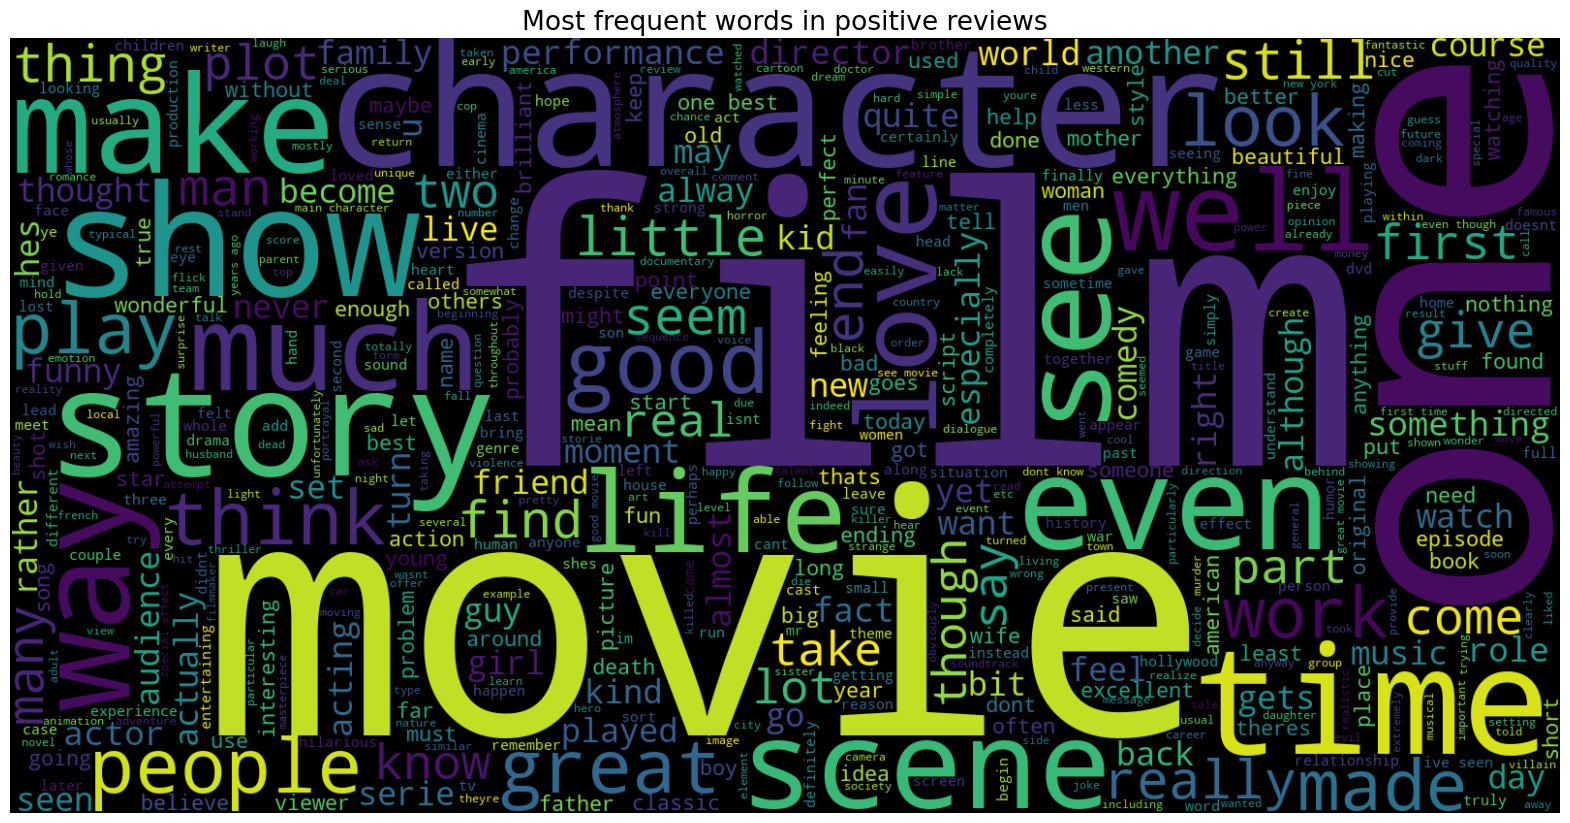

In [29]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

### Looking for 15 most common words

In [30]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [31]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

### barplot of most common words

In [32]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [33]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

### Visualising and bar plot of most common negative words

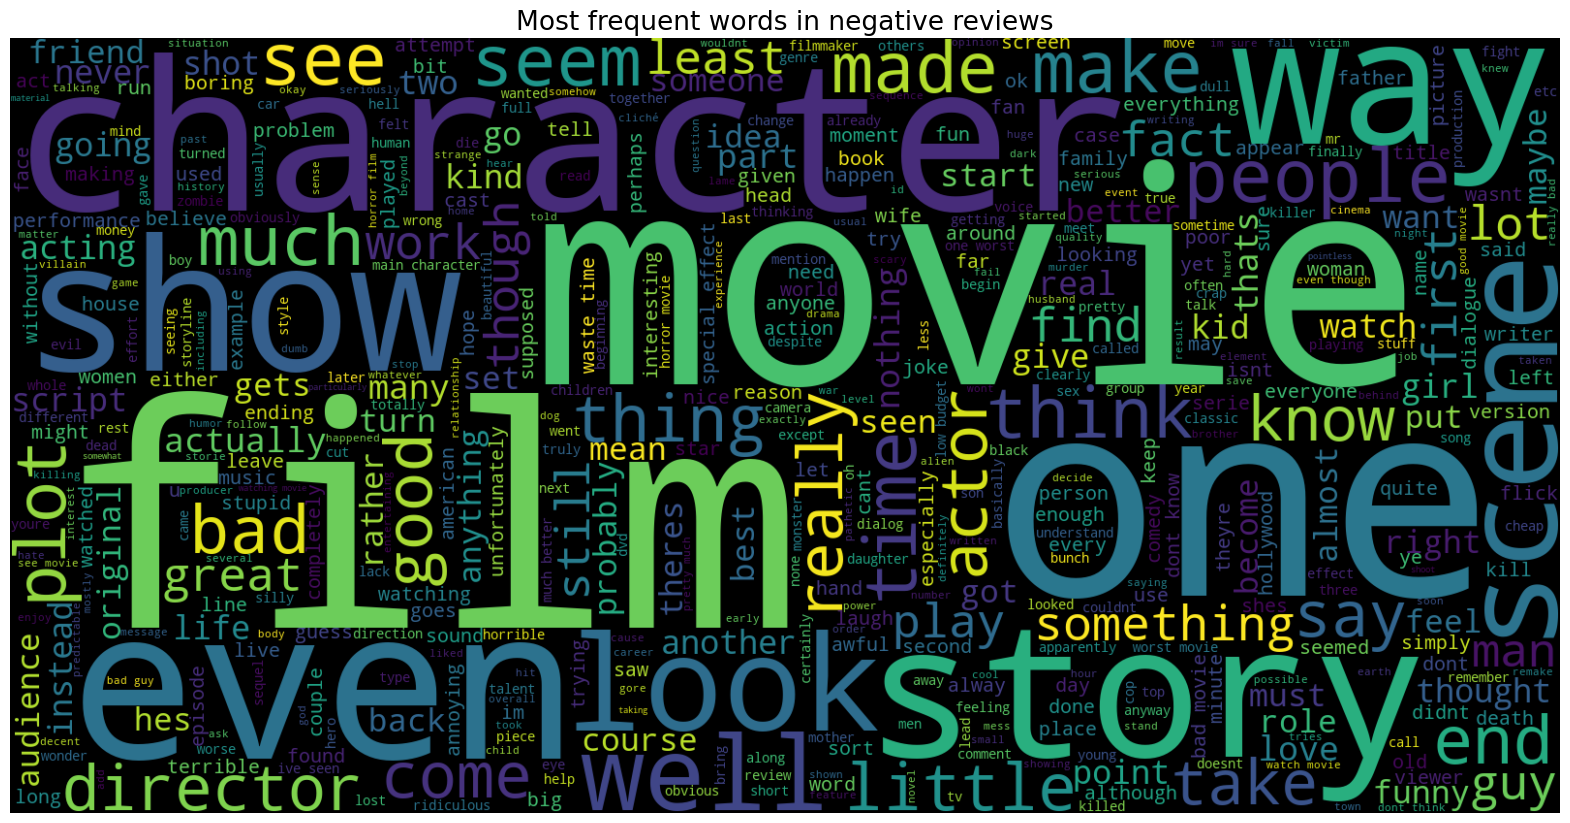

In [34]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [35]:

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [36]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [37]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

### defining the dependent(Y) and independent variable(X)

In [38]:
X = df['review']
Y = df['sentiment']

### TF-IDF stands for Term Frequency-Inverse Document Frequency, a technique that assigns weights to words based on their occurrence in the document and across the dataset.

In [39]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

### Splitting the entire dataset into training set and test set

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [41]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


###  ML  model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Applying Logistic Regression Model

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.99%


In [44]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6784  729]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### Applying Naive Bayes ML model

In [45]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [46]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



### Using support vector classifier find accuracy

In [47]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.22%


In [48]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### Hyperparameter Tuning Using Grid SEarch CV - To incrase Accuracy

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.4s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.3s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.3s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.3s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.7s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.5s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.5s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.5s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.6s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.5s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   1.0s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [50]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [51]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


In [52]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6788  725]
 [ 850 6511]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



## DL Model


In [53]:

x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [54]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 221707)
Size of y_train:  (2000,)
Size of x_test:  (500, 221707)
Size of y_test:  (500,)


In [55]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [59]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
from keras.models import Sequential
from keras.layers import Dense

In [64]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

### Using rmsprop optimiser

In [65]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 15s 59ms/step - loss: -0.5825 - accuracy: 0.4985
Epoch 2/15
200/200 [==============================] - 11s 57ms/step - loss: -4.4691 - accuracy: 0.5005
Epoch 3/15
200/200 [==============================] - 12s 58ms/step - loss: -12.1079 - accuracy: 0.5005
Epoch 4/15
200/200 [==============================] - 11s 56ms/step - loss: -25.4426 - accuracy: 0.5005
Epoch 5/15
200/200 [==============================] - 11s 56ms/step - loss: -45.7060 - accuracy: 0.5005
Epoch 6/15
200/200 [==============================] - 12s 58ms/step - loss: -74.5631 - accuracy: 0.5005
Epoch 7/15
200/200 [==============================] - 11s 54ms/step - loss: -113.7681 - accuracy: 0.5005
Epoch 8/15
200/200 [==============================] - 11s 54ms/step - loss: -163.6073 - accuracy: 0.5005
Epoch 9/15
200/200 [==============================] - 11s 55ms/step - loss: -227.6455 - accuracy: 0.5005
Epoch 10/15
200/200 [==============================] - 11s 56ms

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3547328   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3547473 (13.53 MB)
Trainable params: 3547473 (13.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 16ms/step - loss: -1057.4575 - accuracy: 0.4840
Test loss: -1057.45751953125
Test accuracy: 0.48399999737739563


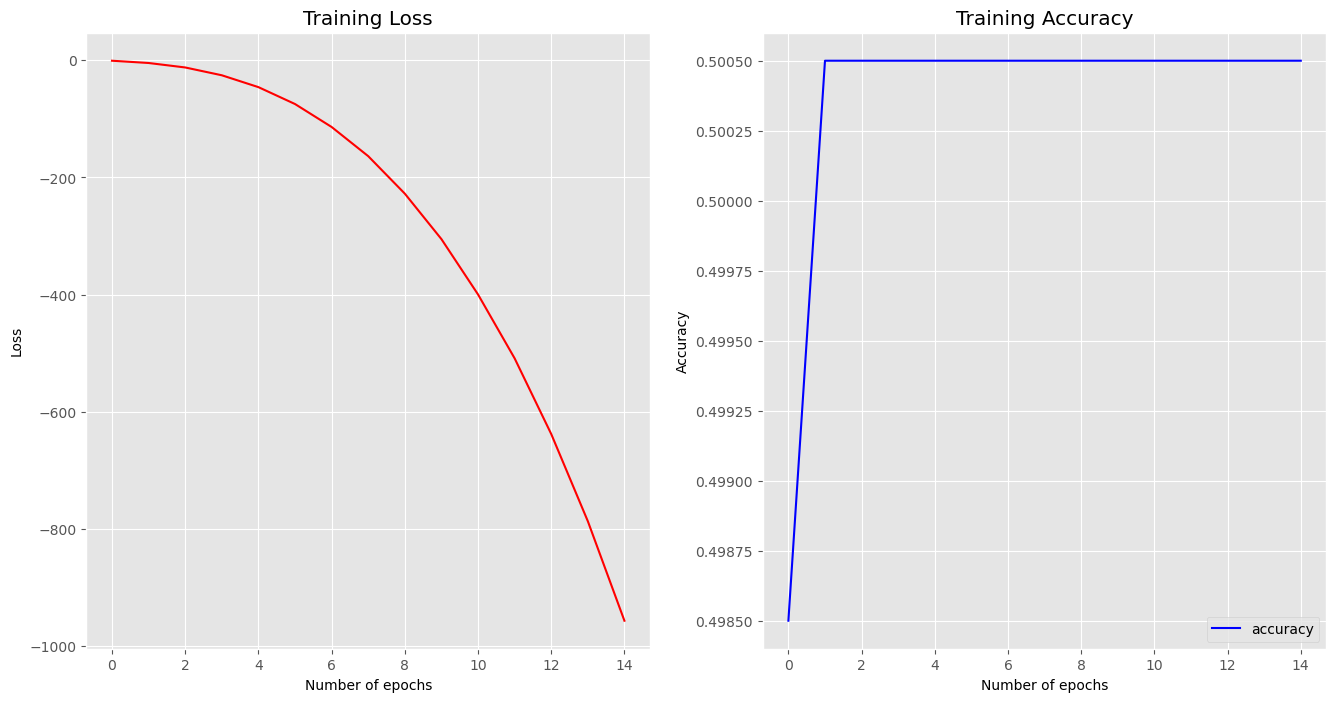

In [69]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

### Using adam optimiser

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 12s 55ms/step - loss: -1.0260 - accuracy: 0.5000
Epoch 2/15
200/200 [==============================] - 11s 54ms/step - loss: -10.5651 - accuracy: 0.5005
Epoch 3/15
200/200 [==============================] - 10s 51ms/step - loss: -41.0669 - accuracy: 0.5005
Epoch 4/15
200/200 [==============================] - 11s 54ms/step - loss: -104.8062 - accuracy: 0.5005
Epoch 5/15
200/200 [==============================] - 11s 54ms/step - loss: -211.7782 - accuracy: 0.5005
Epoch 6/15
200/200 [==============================] - 10s 49ms/step - loss: -369.4122 - accuracy: 0.5005
Epoch 7/15
200/200 [==============================] - 10s 51ms/step - loss: -584.3524 - accuracy: 0.5005
Epoch 8/15
200/200 [==============================] - 11s 54ms/step - loss: -860.5936 - accuracy: 0.5005
Epoch 9/15
200/200 [==============================] - 10s 50ms/step - loss: -1201.6825 - accuracy: 0.5005
Epoch 10/15
200/200 [==============================] - 10s

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                3547328   
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3547473 (13.53 MB)
Trainable params: 3547473 (13.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 14ms/step - loss: -5153.6372 - accuracy: 0.4840
Test loss: -5153.63720703125
Test accuracy: 0.48399999737739563


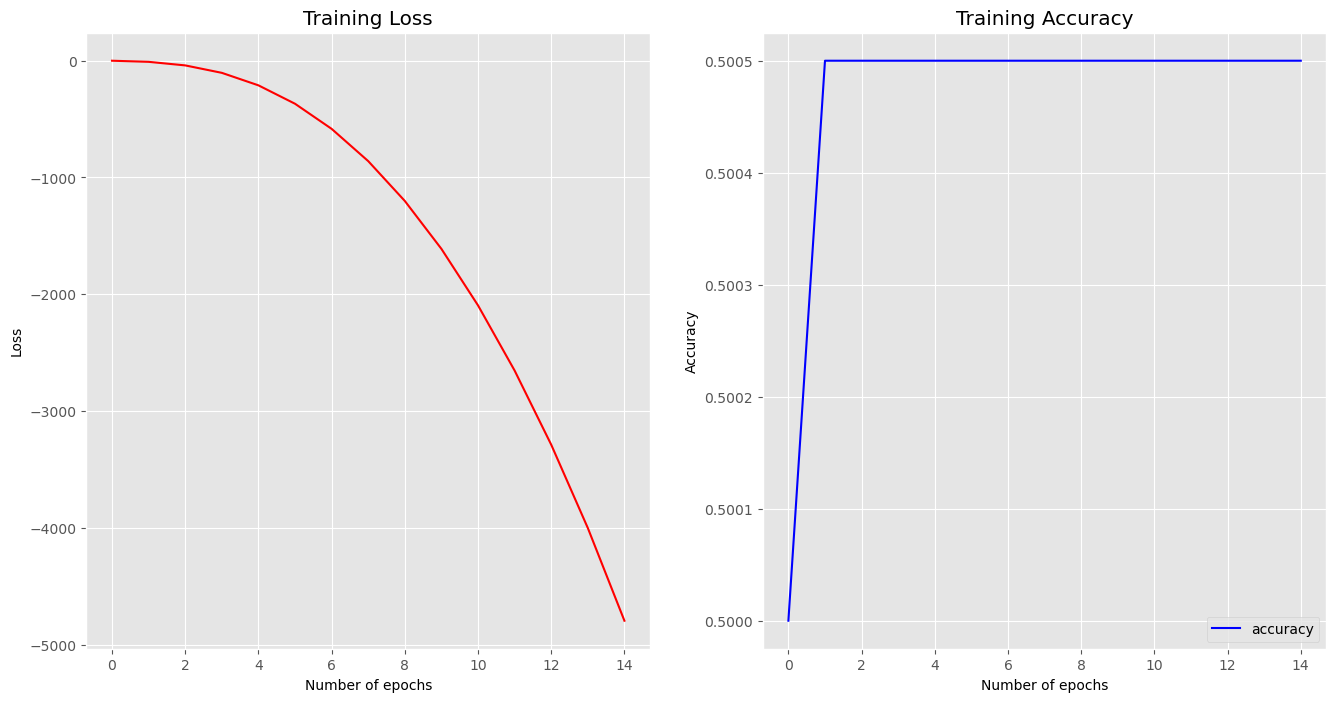

In [75]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()